In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [3]:
gamma_data = stats.gamma.rvs(a=2, scale=3, size=1000)    # To 10
gamma_data 

array([ 7.04568889,  5.87544516, 12.97378357, 13.40632831,  9.17955312,
       21.12923629,  3.27683927, 15.62044488,  5.70936882,  5.12059574,
        8.96682209,  3.62223187,  7.69652556,  3.17563461,  9.97477937,
        8.25634896,  7.28850543, 14.56183405,  3.27282218,  2.35586611,
       10.90547003,  5.66920817,  2.12938232,  6.76824715,  4.35452795,
        1.07259187,  5.06046654,  7.53620148,  3.84561209,  2.77889108,
       16.48255009, 13.43032636,  5.01609543,  1.37078043, 15.12811366,
        2.64383064, 12.70548648,  1.37406212,  4.44474942,  1.1523294 ,
        2.7583559 ,  1.86295549, 11.96204588,  4.44012611,  0.68041677,
        5.7604999 ,  5.02279601, 10.46846165,  3.55784791,  3.04426648,
        1.0056883 ,  6.54264941,  1.57211234,  2.95219341,  3.0769046 ,
        2.94410647,  7.71108506,  9.79555221, 10.28007062,  6.25958555,
        8.71109644,  3.45821382,  8.77819191,  7.42719426,  0.67817999,
        9.13029382,  9.35298623,  1.03106245,  3.74913638,  5.81

<AxesSubplot: ylabel='Density'>

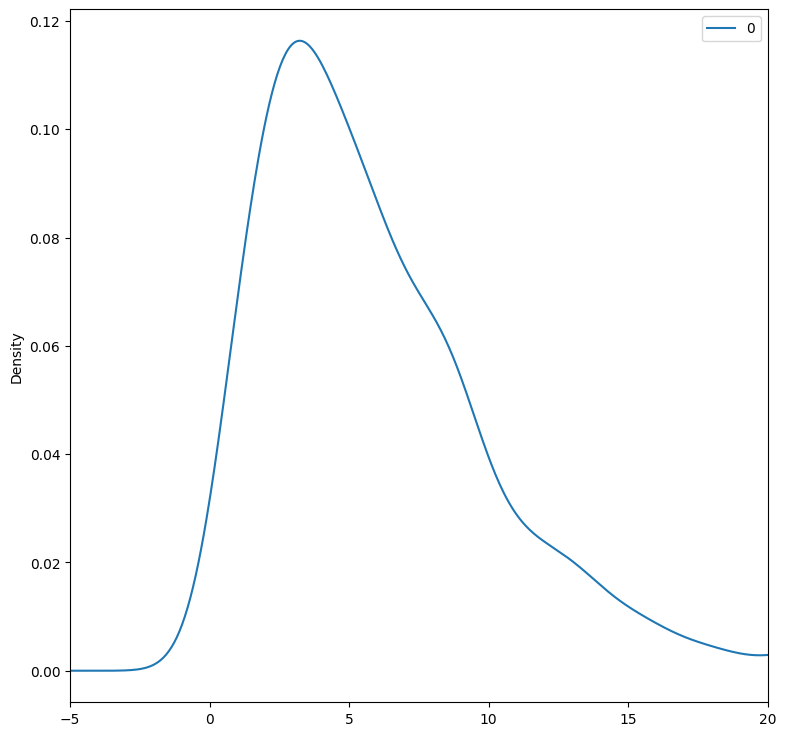

In [6]:
pd.DataFrame(gamma_data).plot(kind="density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-5,20))

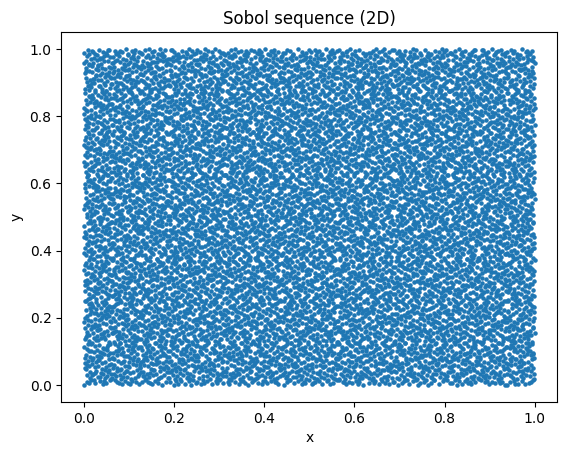

In [10]:
sobol = stats.qmc.Sobol(d=2)
points = sobol.random(n=10000)

plt.scatter(points[:, 0], points[:, 1], s=5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sobol sequence (2D)")
plt.show()

Estimated area: 78.37
Exact area: 78.54


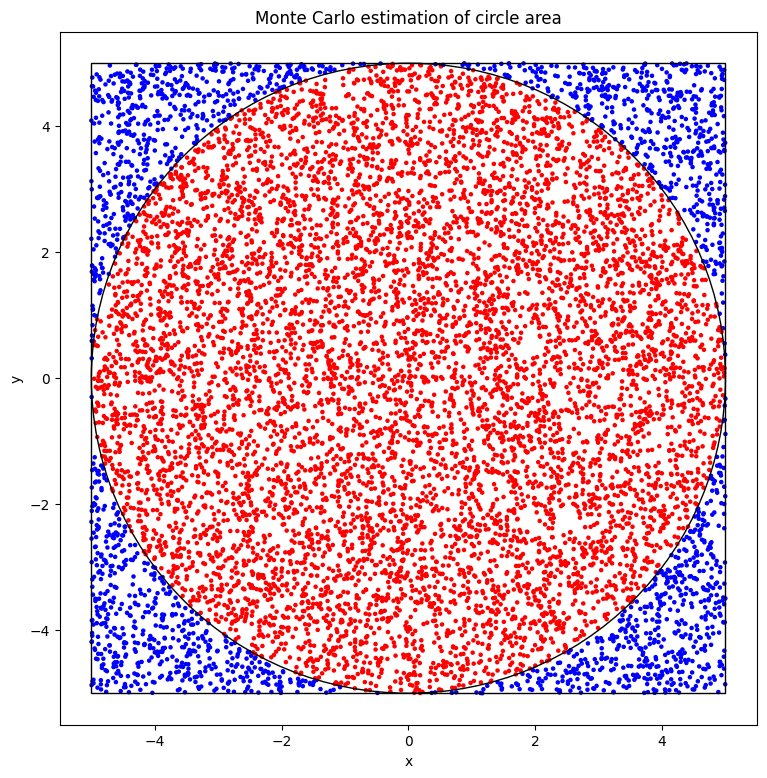

In [65]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import math

# Define radius and center of circle
R = 5 # Radius can be any positive number
a = 0 # Center x-coordinate
b = 0 # Center y-coordinate

# Define side length and area of square
L = 2 * R # Side length must be at least twice the radius
A = L ** 2 # Area of square

# Define number of random points to generate
N = 10000

# Initialize counter for points inside circle
incircle = 0

# Initialize lists for storing point coordinates
x_list = []
y_list = []
color_list = []

# Loop over N points
for i in range(N):
    # Generate random point (x, y) inside square
    x = random.uniform(a - R, a + R)
    y = random.uniform(b - R, b + R)
    
    # Check if point is inside circle using Pythagoras theorem
    if math.sqrt((x - a) ** 2 + (y - b) ** 2) <= R:
        # Increment counter if point is inside circle
        incircle += 1
        
        # Assign red color to point inside circle
        color = "red"
    else:
        # Assign blue color to point outside circle
        color = "blue"
    
    # Append point coordinates and color to lists    
    x_list.append(x)
    y_list.append(y)
    color_list.append(color)

# Estimate area of circle using Monte Carlo method
area = A * incircle / N

# Print estimated area and compare with exact value
print(f"Estimated area: {area:.2f}")
print(f"Exact area: {math.pi * R ** 2:.2f}")

# Create figure and axes objects for plotting 
fig, ax = plt.subplots(figsize=(9, 9))

# Plot points as scatter plot with corresponding colors 
ax.scatter(x_list, y_list, c=color_list, s=5)

# Draw circle patch with center (a, b) and radius R 
circle_patch = patches.Circle((a, b), R, fill=False)
ax.add_patch(circle_patch)

# Draw square patch with lower left corner (-R, -R) and side length L 
square_patch = patches.Rectangle((-R, -R), L , L , fill=False)
ax.add_patch(square_patch)

# Set axis labels and title 
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Monte Carlo estimation of circle area")

# Show plot with size of figure (9,9)
plt.show()


# EJERCICIO DATASET EXOPLANETAS

Identidad de Euler:

$$e^{i\pi}+1=0$$


In [21]:
# Read the csv file in this folder to a dataframe. The file is calle "kepler.csv"
df = pd.read_csv("kepler.csv")

df

,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,OGLE-2016-BLG-1469L b,Confirmed,13.600,3.000,3.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11 Com b,Confirmed,19.400,1.500,1.500,19.400,1.500,1.500,NaN,NaN,...,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
2,11 Oph b,Confirmed,21.000,3.000,3.000,NaN,NaN,NaN,NaN,NaN,...,M9,0.011,0.002,0.002,2375.0,175.0,175.0,NaN,NaN,NaN
3,11 UMi b,Confirmed,10.500,2.470,2.470,10.500,2.470,2.470,NaN,NaN,...,K4III,1.560,0.540,0.540,4340.0,70.0,70.0,NaN,NaN,NaN
4,14 And b,Confirmed,5.330,0.570,0.570,5.330,0.570,0.570,NaN,NaN,...,K0III,NaN,NaN,NaN,4813.0,20.0,20.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,tau Gem b,Confirmed,20.600,NaN,NaN,20.600,NaN,NaN,NaN,NaN,...,K2III,1.220,0.760,0.760,4388.0,25.0,25.0,NaN,NaN,NaN
3728,ups And b,Confirmed,0.620,0.090,inf,0.620,0.090,0.090,NaN,NaN,...,F8 V,3.800,1.000,1.000,6212.0,80.0,80.0,NaN,NaN,NaN
3729,ups And c,Confirmed,9.100,2.900,5.000,1.800,0.260,0.260,NaN,NaN,...,F8 V,3.800,1.000,1.000,6212.0,80.0,80.0,NaN,NaN,NaN
3730,ups And d,Confirmed,23.580,2.295,2.931,10.190,NaN,NaN,NaN,NaN,...,F8 V,3.800,1.000,1.000,6212.0,80.0,80.0,NaN,NaN,NaN


<br>

<br>

<br>

<br>

----------------------------------------------------

# Edad de las estrellas

## Histograma

<AxesSubplot: ylabel='Frequency'>

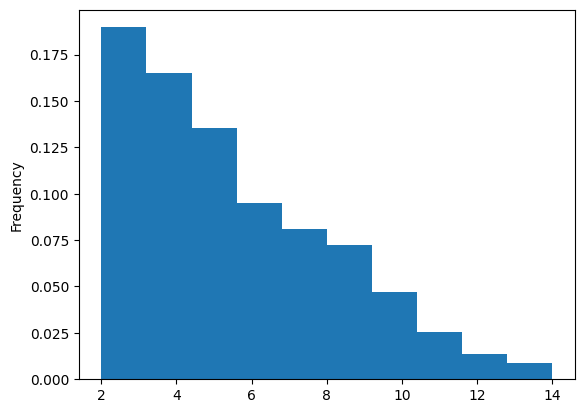

In [99]:
# Códgio para subconjunot de df con "star_age" entre 0 y 14
df_st_age = df[(df["star_age"] >= 2) & (df["star_age"] <= 14)]


df_st_age["star_age"].plot.hist(density=True)

## Boxplot

<AxesSubplot: >

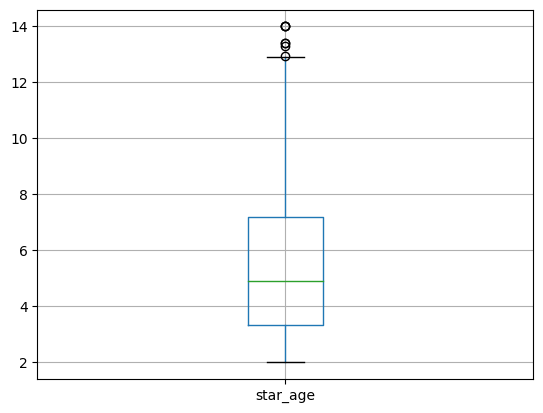

In [100]:
df_st_age.boxplot(column="star_age")

Según el boxplot, la distribución no es simétrica, ya que la cola de la distribución es más larga a la derecha que a la izquierda.

## Describe

In [101]:
print(df_st_age["star_age"].describe())

print("La mediana es: {}".format(df_st_age["star_age"].median()))

count    782.000000
mean       5.507288
std        2.681218
min        2.000000
25%        3.355000
50%        4.900000
75%        7.187500
max       14.000000
Name: star_age, dtype: float64
La mediana es: 4.9


Según el describe, la media es 4.57, la mediana es 4.5, el mínimo es 0.0 y el máximo es 14.0. La distribución es simétrica, ya que la media y la mediana son muy parecidas.

## QQ-plot

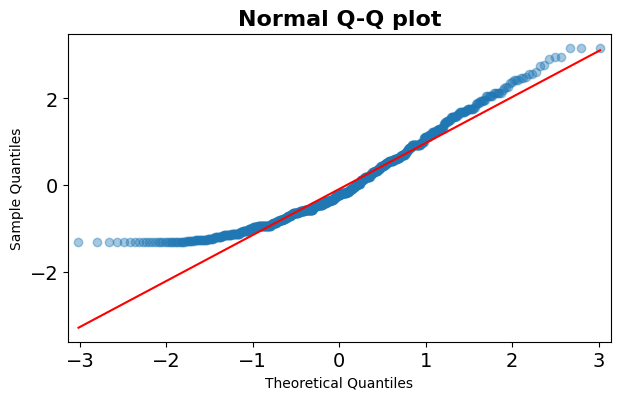

In [102]:
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(7,4))

# Quita los nan de df["star_age"]


sm.qqplot(df_st_age["star_age"].dropna(), 
          fit = True,
          line = 'q',
          alpha = 0.4,
          lw = 2,
          ax = ax)

ax.set_title("Normal Q-Q plot", fontsize = 16, fontweight = 'bold')

ax.tick_params(labelsize = 14)

Según el QQ-plot, la distribución no es simétrica, ya que por la parte izquierda no sigue la línea teórica

## Asimetría y Kurtosis

In [103]:
print("Kurtosis", stats.kurtosis(df_st_age["star_age"]))
print("Skewness", stats.skew(df_st_age["star_age"]))

Kurtosis -0.072335825098647
Skewness 0.7815616535498834


Según los valores de asimetría y kurtosis, la distribución es simétrica, ya que los valores son muy parecidos a 0.

## Contraste de Hipótesis

In [104]:
shapiro_test = stats.shapiro(df_st_age["star_age"])
shapiro_test

ShapiroResult(statistic=0.934643030166626, pvalue=5.284374273713869e-18)

Según el shape test, la distribución no es simétrica, ya que el p-value es menor que 0.05.

In [105]:
k2, p_value = stats.normaltest(df_st_age['star_age'])
print(f"Estatístico de prueba: {k2}, p-value: {p_value}")

Estatístico de prueba: 64.51214338977154, p-value: 9.803159189712942e-15


Según el kurtosis test, la distribución no es simétrica, ya que el p-value es menor que 0.05.

<br>

<br>

<br>

-----------------------------
# Radio de las estrellas

## Histograma

Ploteamos el histograma del radio de las estrellas.

<AxesSubplot: ylabel='Frequency'>

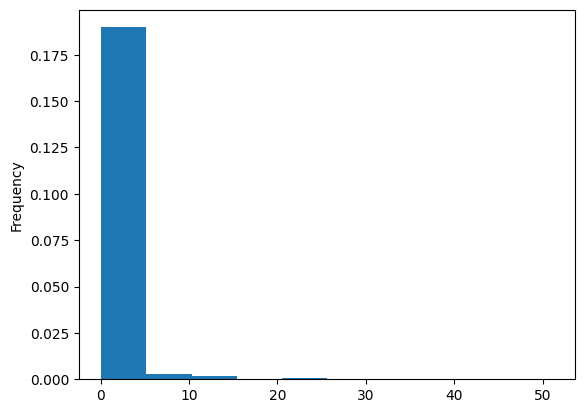

In [44]:
df["star_radius"].plot.hist(density=True)

Nos quedamos solo con el subconjunto con radio < 2.5

<AxesSubplot: ylabel='Frequency'>

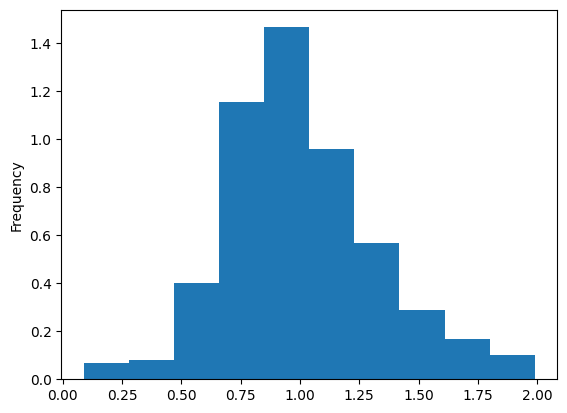

In [98]:
# De la columna star_radius quiero el histograma solo para valores menores a 5

df_st_rd = df[df["star_radius"] < 2] 

df_st_rd["star_radius"].plot.hist(density=True)



## Box-Plot

<AxesSubplot: >

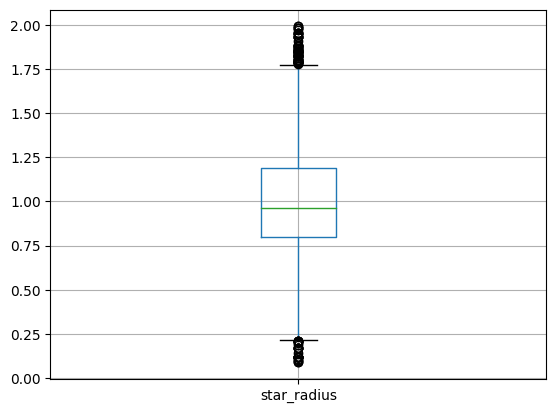

In [90]:
df_st_rd.boxplot(column="star_radius")

Vemos como los bigotes del boxplot tienen más o menos la misma longitud, por lo que la distribución es simétrica.

## Describe

In [91]:
print(df_st_rd["star_radius"].describe())

print("La mediana es: {}".format(df_st_rd["star_radius"].median()))

count    3079.000000
mean        1.000848
std         0.320764
min         0.089000
25%         0.800000
50%         0.960000
75%         1.190000
max         1.990000
Name: star_radius, dtype: float64
La mediana es: 0.96


Vemos que la mediana y la media se parecen bastante, por lo que la distribución es simétrica.

## QQ Plot

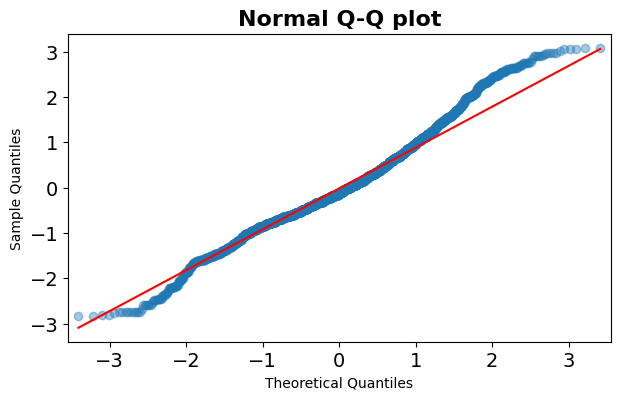

In [92]:
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(7,4))

sm.qqplot(df_st_rd["star_radius"], 
          fit = True,
          line = 'q',
          alpha = 0.4,
          lw = 2,
          ax = ax)

ax.set_title("Normal Q-Q plot", fontsize = 16, fontweight = 'bold')

ax.tick_params(labelsize = 14)

Según el QQ-plot, **parece** que la distribución es normal.

## Asimetríca y Kurtosis

In [93]:
print("Kurtosis", stats.kurtosis(df_st_rd["star_radius"]))
print("Skewness", stats.skew(df_st_rd["star_radius"]))

Kurtosis 0.49998835473762915
Skewness 0.4096856150861741


Estos valores de la Kurtosis y el Skewness (Kursotis 1.2517820228868572
Skewness 0.7344903781453088) indican que la distribución es simétrica.

## Contraste de Hipótesis

In [94]:
shapiro_test = stats.shapiro(df_st_rd["star_radius"])
shapiro_test

ShapiroResult(statistic=0.981224000453949, pvalue=8.968224346640303e-20)

P-valor nos sale 0.0, por lo que rechazamos la hipótesis nula de que la distribución es normal.

In [96]:
k2, p_value = stats.normaltest(df_st_rd['star_radius'])
print(f"Estatístico de prueba: {k2}, p-value: {p_value}")

Estatístico de prueba: 101.79866532836832, p-value: 7.846946495676248e-23


## OTROS

<AxesSubplot: ylabel='Frequency'>

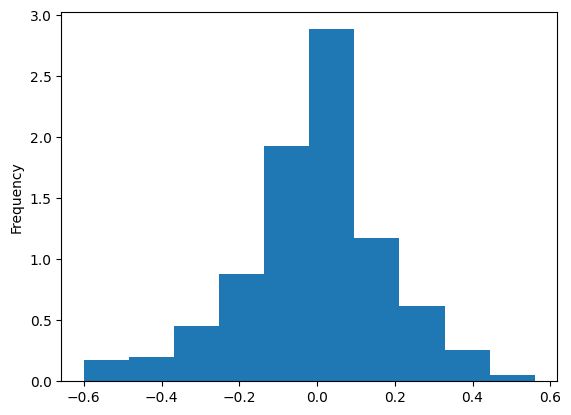

In [123]:
df_st_mt = df[(df["star_metallicity"] >= -0.6) & (df["star_metallicity"] <= 0.6)]

df_st_mt["star_metallicity"].plot.hist(density=True)

In [124]:
k2, p_value = stats.normaltest(df_st_mt['star_metallicity'])
print(f"Estatístico de prueba: {k2}, p-value: {p_value}")

Estatístico de prueba: 124.66162527777283, p-value: 8.51279192817945e-28
